In [151]:
import random
import numpy as np
from sklearn import datasets
from importlib import reload
import matplotlib.pyplot as plt
import time

### Reload modules after changes

In [244]:
import __init__
import distributions
import kernel
import fuzzifier
import optimization

reload(__init__)
reload(distributions)
reload(kernel)
reload(fuzzifier)
reload(optimization)

from __init__ import *
from distributions import *
from kernel import *
from fuzzifier import *
from optimization import *

In [130]:
from mulearn import FuzzyInductor as fz
from mulearn.kernel import LinearKernel as link
from mulearn.fuzzifier import LinearFuzzifier as linf

## Testing

In [3]:
def generate_dataset(n_samples=10, n_features=1):

    X = np.zeros((n_samples, n_features))

    for elem in range(n_samples):
        for dim in range(n_features):
            X[elem][dim] = random.uniform(0,1)

    gaussian = lambda x,var : np.e ** (-((x-0.5)**2)/(2*var))

    y = np.zeros(n_samples)
    
    for elem in range(n_samples):
        y[elem] = 1
        for dim in range(n_features):
            y[elem] *= gaussian(X[elem][dim], np.var([X[j][dim] for j in range(n_samples)]))
                          
    
    return X,y

In [256]:
X,y = generate_dataset(n_samples=50,n_features=1)

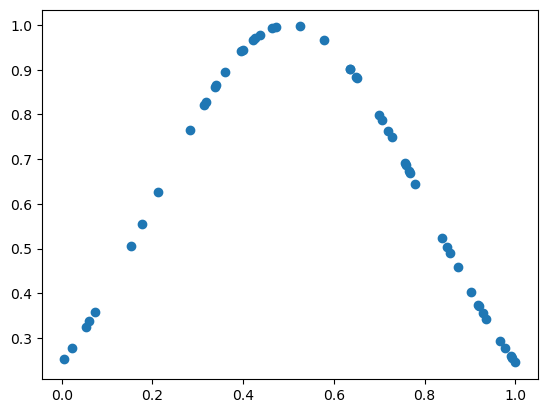

In [257]:
plt.scatter(X,y)
plt.show()

In [252]:
model = FuzzyInductor()

In [253]:
s_time = time.time()
model.fit(X=X, y=y)
print("Fit time: ", time.time() - s_time)
print("Dataset size: ", len(X))


Interrupt request received
Fit time:  63.21381211280823
Dataset size:  1500


In [258]:
model2 = fz() #original mulearn

In [255]:
s_time = time.time()
model2.fit(X=X, y=y)
print("Fit time: ", time.time() - s_time)
print("Dataset size: ", len(X))

Fit time:  84.73789143562317
Dataset size:  1500


## Fuzzy set shape testing

non-diagonal Gram matrix, retrying with adjustment 770.0


Objective Q not PSD (diagonal adjustment of 7.7e+02 would be required). Set NonConvex parameter to 2 to solve model.


non-diagonal Gram matrix, retrying with adjustment 770.0
non-diagonal Gram matrix, retrying with adjustment 770.0


Objective Q not PSD (diagonal adjustment of 7.7e+02 would be required). Set NonConvex parameter to 2 to solve model.
model FuzzyInductor(c=1, k=HyperbolicKernel(), f=LinearFuzzifier(), solver=GurobiSolver(, adjustment=0)) failed
Objective Q not PSD (diagonal adjustment of 7.7e+02 would be required). Set NonConvex parameter to 2 to solve model.


non-diagonal Gram matrix, retrying with adjustment 770.0


model FuzzyInductor(c=1, k=HyperbolicKernel(), f=ExponentialFuzzifier(), solver=GurobiSolver(, adjustment=0)) failed
Objective Q not PSD (diagonal adjustment of 7.7e+02 would be required). Set NonConvex parameter to 2 to solve model.


non-diagonal Gram matrix, retrying with adjustment 770.0


Objective Q not PSD (diagonal adjustment of 7.7e+02 would be required). Set NonConvex parameter to 2 to solve model.


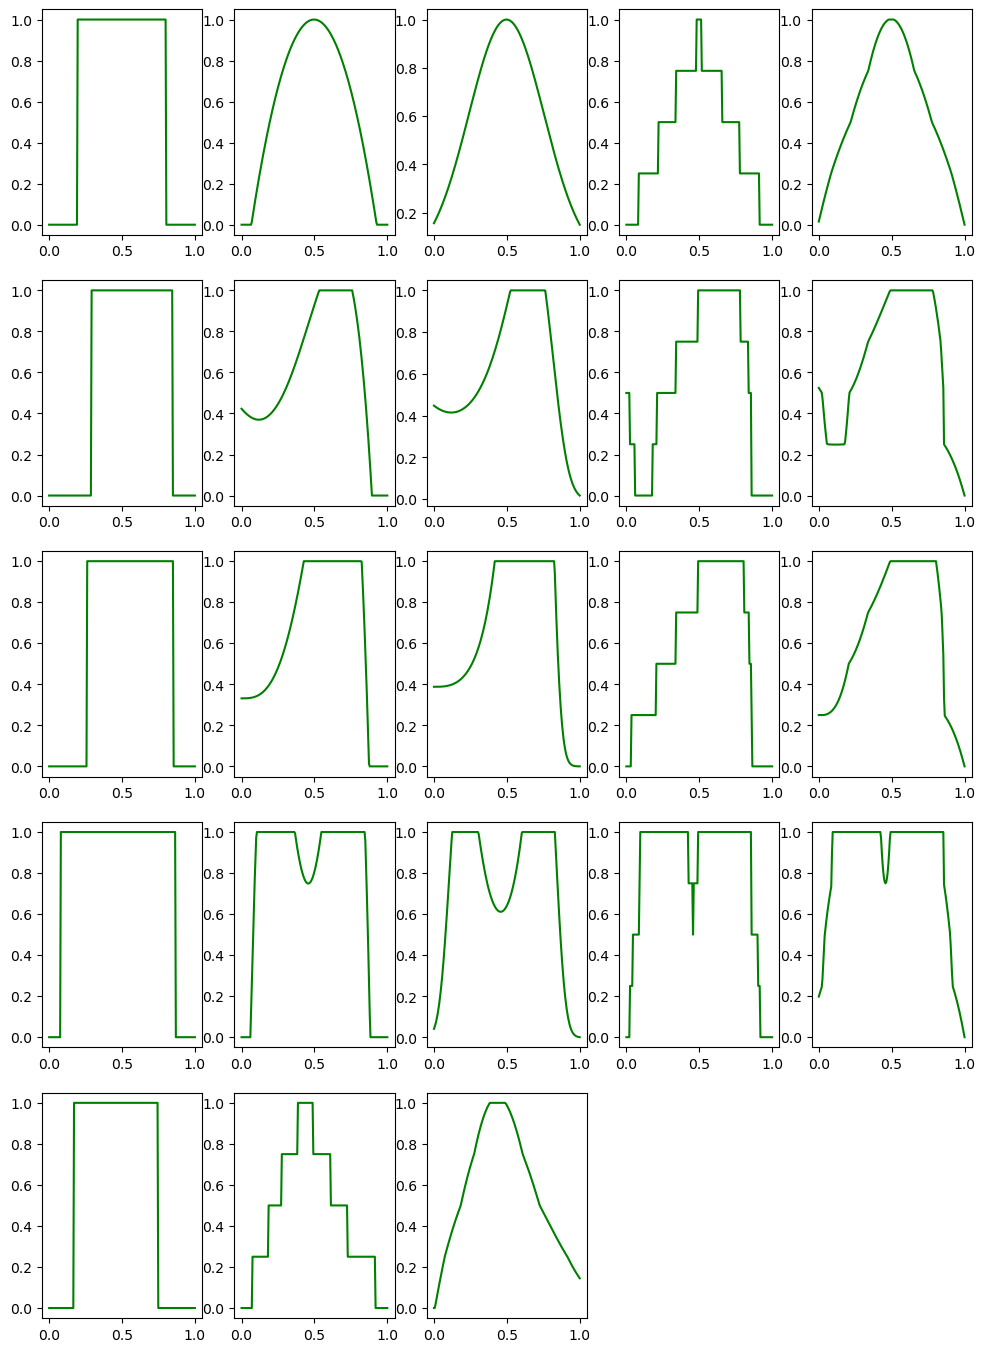

In [260]:
degree = 3

kernels = [LinearKernel(), PolynomialKernel(3), HomogeneousPolynomialKernel(3), GaussianKernel(), HyperbolicKernel()]
fuzzifiers = [CrispFuzzifier(), LinearFuzzifier(), ExponentialFuzzifier(), QuantileConstantPiecewiseFuzzifier(), 
              QuantileLinearPiecewiseFuzzifier()]

X_train, y_train = generate_dataset(n_samples=100, n_features=1)
X_new = np.linspace(0, 1, 200).reshape(-1, 1)

gridx, gridy = 5, 5
k = 1

plt.figure(figsize=(12, 17))

for kernel in kernels:
    for fuzzifier in fuzzifiers:

        model = FuzzyInductor(k=kernel, fuzzifier=fuzzifier, solver=GurobiSolver(adjustment='auto'))
    
        try:
            model.fit(X_train, y_train)
        except ValueError:
            print(f"model {model.__repr__()} failed")
            continue
        
        plt.subplot(gridx,gridy,k)
        #plt.title(model.__repr__())
        plt.plot(X_new, model.predict(X_new), color='green')

        k+=1

plt.show()

